# SVM

In [2]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
def metricas(y_pred,y_test):

  print(classification_report(y_test,y_pred))
  
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

In [4]:
ds_hotels = pd.read_csv("./hotels_modificado_train.csv")
ds_h = ds_hotels.copy() 

In [5]:
def agent_a_string(value):
    return str(value)
ds_h["agent"] = ds_h["agent"].apply(agent_a_string)
ds_h[ds_h.duplicated("id")]
ds = ds_h.drop(["id"], axis="columns", inplace=False)
filas_totales=ds.shape[0]
print(ds.isna().sum()/filas_totales*100)

hotel                             0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr                               0.0
required_car

### Preprocesamiento de datos y division de estos

One Hot Encoding para variables categoricas

In [6]:
var_cual = ["hotel", "arrival_date_month", "meal", "country", "market_segment", 
"distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "agent", 
"customer_type"]
ds = pd.get_dummies(ds, columns=var_cual, drop_first=True)

Divido el Dataset: 70% para train y 20% para test

In [7]:
#Creo un dataset con los features que voy a usar para clasificar
ds_x=ds.drop(['is_canceled'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_y = ds['is_canceled'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(ds_x,
                                                    ds_y, 
                                                    test_size=0.2,  #proporcion 80/20
                                                    random_state=4, #semilla
                                                    stratify=ds["is_canceled"].values) 

### SVM + Normalización de Datos

In [8]:
#Armo una version escalada con minmax (media=0 , var=1  )
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train) 
x_test_minmax  = min_max_scaler.transform(x_test) 

#Armo una version estandarizada
stand_scaler = preprocessing.StandardScaler()
x_train_norm = stand_scaler.fit_transform(x_train)
x_test_norm=stand_scaler.transform(x_test)

#### SVM con datos SIN escalar

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      5506
           1       1.00      0.00      0.00      3477

    accuracy                           0.61      8983
   macro avg       0.81      0.50      0.38      8983
weighted avg       0.76      0.61      0.47      8983



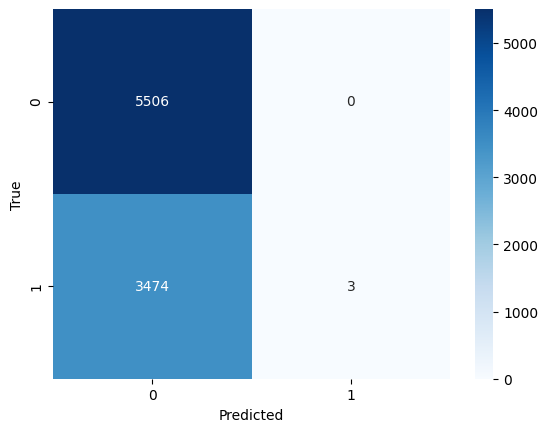

In [8]:
#Construyo un modelo SVM  
svm = SVC()

#Lo entreno con los datos sin escalar
svm.fit(x_train, y_train)

#Hago la prediccion y calculo las métricas
y_pred=svm.predict(x_test)
metricas(y_pred,y_test)

#### SVM con los datos escalados con normalizacion

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      5506
           1       0.74      0.70      0.72      3477

    accuracy                           0.79      8983
   macro avg       0.78      0.77      0.77      8983
weighted avg       0.79      0.79      0.79      8983



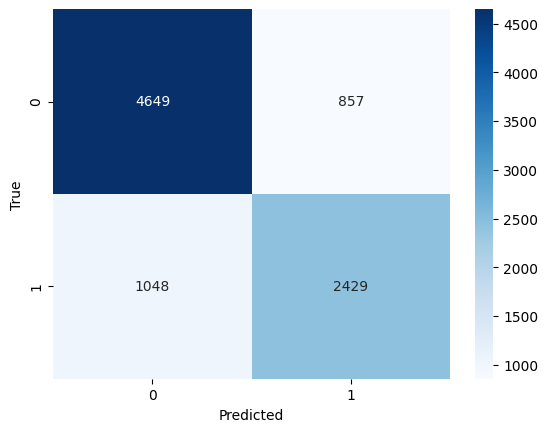

In [9]:
#Construyo un modelo SVM  
svm_norm= SVC()

#Lo entreno con los datos escalados con normalizacion
svm_norm.fit(x_train_norm, y_train)

#Hago la prediccion y calculo las métricas
y_pred_norm=svm_norm.predict(x_test_norm)
metricas(y_pred_norm,y_test)

#### SVM con datos escalados con Min Max

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      5506
           1       0.75      0.78      0.76      3477

    accuracy                           0.81      8983
   macro avg       0.80      0.81      0.80      8983
weighted avg       0.81      0.81      0.81      8983



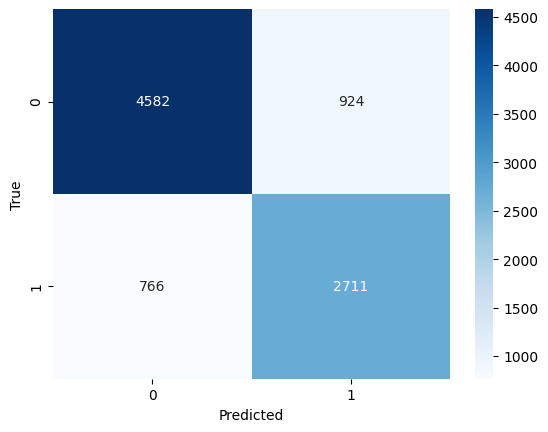

In [10]:
#Construyo un modelo SVM  
svm_minmax= SVC()

#Lo entreno con los datos escalados con min max
svm_minmax.fit(x_train_minmax, y_train)

#Hago la prediccion y calculo las métricas
y_pred_minmax=svm_minmax.predict(x_test_minmax)
metricas(y_pred_minmax,y_test)

### SVM + PCA

Escalamos los datos para poder aplicar PCA

Text(0, 0.5, 'Varianza Explicada (%)')

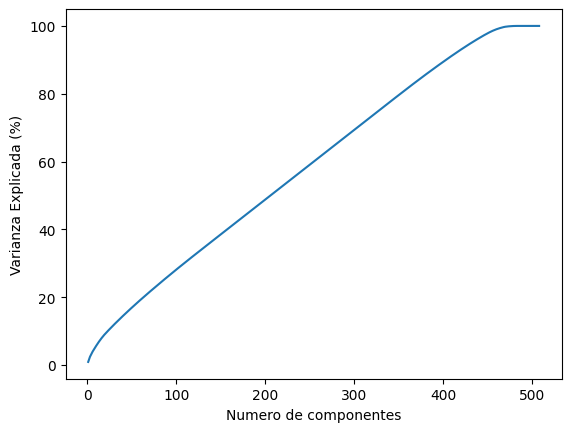

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Escalo los datos de entrenamiento
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)

# PCA sobre los datos escalados
pca = PCA(n_components = None)
pca.fit(x_train_scaled)

#Cantidad de Componentes
componentes = len(pca.explained_variance_ratio_) 

#Grafico la Varianza Explicada 
plt.plot(range(1,componentes+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Numero de componentes")
plt.ylabel("Varianza Explicada (%)")

En el gráfico vemos que con 450 componentes se explica mas del 90% de la variabilidad de los datos. 

Probemos entrenar una SVM tomando 450 componentes

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      5506
           1       0.73      0.68      0.71      3477

    accuracy                           0.78      8983
   macro avg       0.77      0.76      0.77      8983
weighted avg       0.78      0.78      0.78      8983



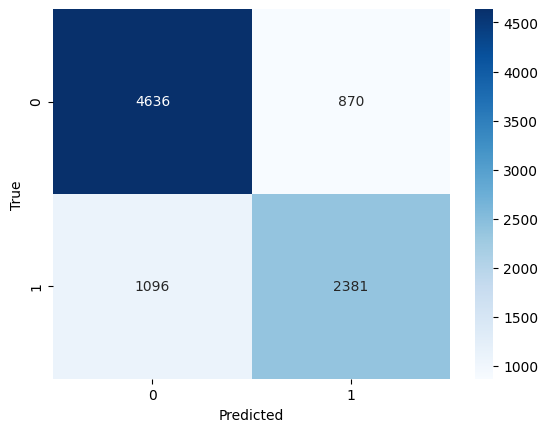

In [12]:
from sklearn.pipeline import Pipeline

#Defino el tipo de escalado, la transformacion PCA y el modelo
_sc = StandardScaler()
_pca = PCA(n_components = 450)
_model = SVC()

#Creo un pipeline
svm_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('svm', _model)
])

#Entreno sobre los datos que serán previamente escalados y transformados
svm_model.fit(x_train,y_train)

#Hago la predicción y calculo las métricas
y_pred_pca=svm_model.predict(x_test)
metricas(y_pred_pca,y_test)

### SVM - Kernels

#### SVM con kernel LINEAL

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      5506
           1       0.73      0.65      0.69      3477

    accuracy                           0.77      8983
   macro avg       0.76      0.75      0.75      8983
weighted avg       0.77      0.77      0.77      8983



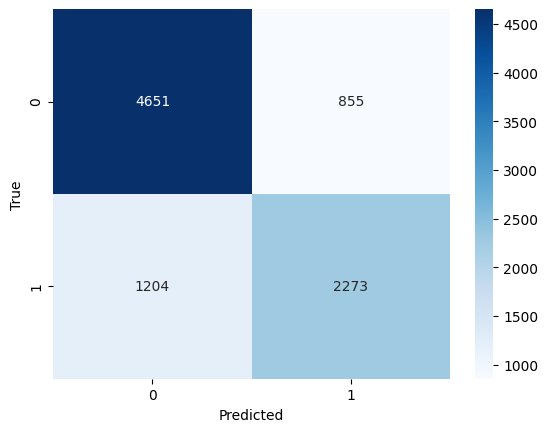

In [31]:
#Creo un clasificador con kernel lineal y lo entreno sobre los datos escalados min-max
clf_svm_lineal = SVC(kernel='linear', C=5)
clf_svm_lineal.fit(x_train, y_train)

#Hago la predicción y calculo las métricas
y_pred_lin=clf_svm_lineal.predict(x_test)
metricas(y_pred_lin,y_test)

Guardo el SVM con Kernel Lineal

In [32]:
# Guardar
import joblib
filename = 'svm_lineal.sav'
joblib.dump(clf_svm_lineal, filename)

['svm_lineal.sav']

El predict para kaggle esta hecho más abajo junto con el resto de kernels

#### SVM con kernel POLINOMICO

c:\Users\LUCAS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2500000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.75      0.63      0.68      5506
           1       0.53      0.67      0.59      3477

    accuracy                           0.64      8983
   macro avg       0.64      0.65      0.64      8983
weighted avg       0.67      0.64      0.65      8983



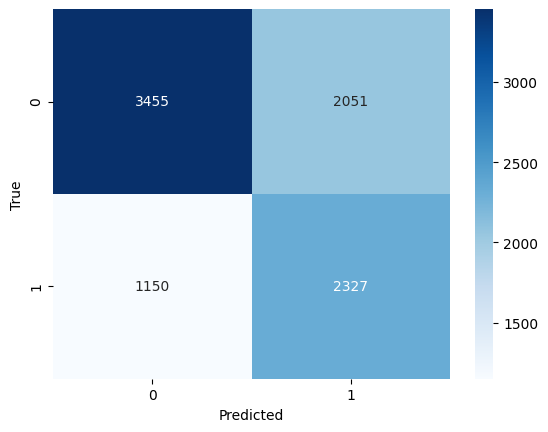

In [42]:
#Creo un clasificador con kernel lineal y lo entreno sobre los datos escalados min-max
svm_polinomico = SVC(kernel='poly', C=10,degree=15, gamma=15, coef0=15,max_iter=2500000)
svm_polinomico.fit(x_train_minmax, y_train)

#Hago la predicción y calculo las métricas
y_pred_lin=svm_polinomico.predict(x_test_minmax)
metricas(y_pred_lin,y_test)

Guardamos SVM Polinomico

In [ ]:
# Guardar
import joblib
filename = 'svm_radial.sav'
joblib.dump(svm_polinomico, filename)

#### SVM con kernel RADIAL

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      5506
           1       0.04      0.00      0.00      3477

    accuracy                           0.61      8983
   macro avg       0.33      0.50      0.38      8983
weighted avg       0.39      0.61      0.46      8983



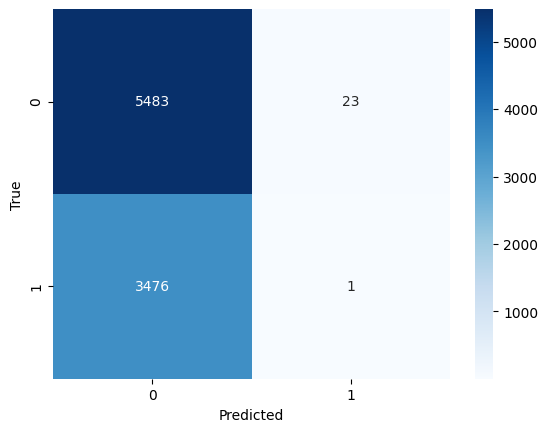

In [10]:
#Creo un clasificador con kernel radial y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='rbf', C=5, gamma=10)
clf.fit(x_train, y_train)

#Hago la predicción y calculo las métricas
y_pred_rad=clf.predict(x_test)
metricas(y_pred_rad,y_test)

### Hacemos el Predict para Kaggle

#### Pre Procesamiento de Datos de hotel_test

In [12]:
ds_hotels_test = pd.read_csv("./hotels_test.csv")
ds_h_test = ds_hotels_test.copy()
ds_h_test.drop(columns="reservation_status_date", inplace=True)

In [13]:
filas_totales=ds_hotels_test.shape[0]
print(ds_h_test.isna().sum()/filas_totales*100)

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.000000
babies                             0.000000
meal                               0.000000
country                            0.358018
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

In [14]:
ds_h_test.drop(columns= 'company', inplace = True)

In [15]:
ds_h_test.isin(['Undefined']).sum()

hotel                               0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                              238
country                             0
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [16]:
#One hot encoding para variables categoricas
var_cual = ["hotel", "arrival_date_month", "meal", "country", "market_segment", 
"distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "agent", 
"customer_type"]
ds_h_test = pd.get_dummies(ds_h_test, columns=var_cual, drop_first=True)

ds_h_test.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,agent_495.0,agent_502.0,agent_508.0,agent_510.0,agent_526.0,agent_527.0,agent_531.0,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,277,2016,46,7,1,2,2,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,286,2016,20,11,0,4,2,0.0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,0,2016,35,23,0,1,3,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,196,2016,44,29,2,5,2,2.0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,232,2016,48,26,2,1,2,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [17]:
print(ds_h_test.isna().sum()/filas_totales*100)

lead_time                        0.0
arrival_date_year                0.0
arrival_date_week_number         0.0
arrival_date_day_of_month        0.0
stays_in_weekend_nights          0.0
                                ... 
agent_527.0                      0.0
agent_531.0                      0.0
customer_type_Group              0.0
customer_type_Transient          0.0
customer_type_Transient-Party    0.0
Length: 461, dtype: float64


Para poder hacer el predict saco las columnas nuevas que me quedaron en el encoding y agrego las que tenia en el dataframe con el cual entrene al arbol que uso e inicializandolas en _false_

In [18]:
# Agarramos las columnas diferentes de ds
diff_cols_df2 = set(ds.columns) - set(ds_h_test.columns)

# Agrego las columnas faltantes en ds_h_test y las inicializo en false
for col in diff_cols_df2:
    ds_h_test[col] = np.False_

# Solo me quedo con las columnas de ds_h_test que esten en ds
df_test = ds_h_test[ds.columns]

In [19]:
ds_kag = df_test.drop(["is_canceled"], axis="columns", inplace=True)

C:\Users\LUCAS\AppData\Local\Temp\ipykernel_16428\2483917292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_kag = df_test.drop(["is_canceled"], axis="columns", inplace=True)


Utilizo Pipeline para reemplazar datos nulls con la mediana encontrada en ds para cada valor

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
pipeline = Pipeline([  ('imputer', imputer)])
pipeline.fit(ds)

# Obtener lista de columnas de ds
cols_ds = ds.columns

# Seleccionar solo las columnas presentes en ds en ds_h_test
cols_ds_h_test = [col for col in df_test.columns if col in cols_ds]

# Aplicar pipeline solo a las columnas presentes en ambos dataframes
pipeline.fit(ds[cols_ds_h_test])
df_test[cols_ds_h_test] = pipeline.transform(df_test[cols_ds_h_test])

C:\Users\LUCAS\AppData\Local\Temp\ipykernel_16428\3663599621.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[cols_ds_h_test] = pipeline.transform(df_test[cols_ds_h_test])


#### Hacemos el Predict para Kaggle de SVM con kernel Radial

In [21]:
y_pred_svm_radial=clf.predict(df_test)

In [22]:
ds_kaggle = pd.DataFrame({'id': ds_h_test['id'], 'is_canceled': y_pred_svm_radial})

In [23]:
ds_kaggle.to_csv('pred_kaggle_svm_radial.csv', index=False)

Guardamos SVM con kernel Radial

In [ ]:
# Guardar
import joblib
filename = 'svm_radial.sav'
joblib.dump(clf, filename)

['svm_radial.sav']

#### Hacemos el Predict para Kaggle de SVM con kernel Lineal

In [33]:
y_pred_svm_lineal=clf_svm_lineal.predict(df_test)

In [34]:
ds_kaggle_svm_lineal = pd.DataFrame({'id': ds_h_test['id'], 'is_canceled': y_pred_svm_lineal})

In [35]:
ds_kaggle_svm_lineal.to_csv('pred_kaggle_svm_lineal.csv', index=False)

#### Hacemos el Predict para Kaggle de SVM con kernel Polinomico

In [ ]:
y_pred_svm_polinomico=svm_polinomico.predict(df_test)

In [ ]:
ds_kaggle_svm_polinomico = pd.DataFrame({'id': ds_h_test['id'], 'is_canceled': y_pred_svm_polinomico})

In [ ]:
ds_kaggle_svm_polinomico.to_csv('pred_kaggle_svm_polinomico.csv', index=False)